In [1]:
!pip install PyWavelets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 13.9 MB/s eta 0:00:00


Best Parameters for SVM: {'C': 10000, 'epsilon': 0.01, 'kernel': 'rbf'}
Mean Squared Error: 271001046.38


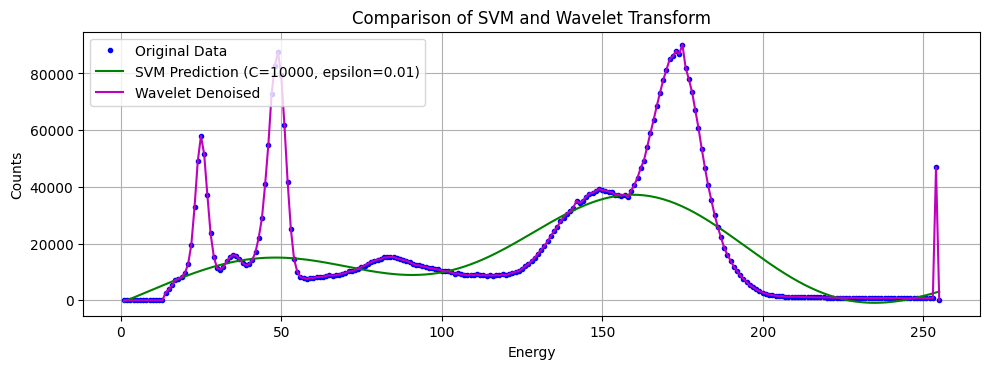

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import pywt

# 1. Read data from the CSV file
filename = '15.5.csv'
data = pd.read_csv(filename)

# Assuming the columns are named 'energy' and 'counts' in your CSV
energy = data.iloc[:, 0].values
spectrum = data.iloc[:, 1].values  # 'counts' as the intensity

# 2. Normalize the data for SVM
scaler = StandardScaler()
energy_scaled = scaler.fit_transform(energy.reshape(-1, 1))

# 3. Define the parameter grid for Grid Search
param_grid = {
    'kernel': ['rbf'],
    'C': [1, 10, 100, 1000, 10000, 100000, 1000000],
    'epsilon': [0.01, 0.1, 0.2, 0.5, 1.0]
}

# 4. Create and fit the GridSearchCV model
svm_model = SVR()
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(energy_scaled, spectrum)

# Get the best model
best_svm_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print("Best Parameters for SVM:", best_params)

# 5. Predict using the best SVM model
spectrum_svm_pred = best_svm_model.predict(energy_scaled)

# 6. Evaluate model performance
mse = mean_squared_error(spectrum, spectrum_svm_pred)
print(f"Mean Squared Error: {mse:.2f}")

# 7. Perform Wavelet Transform
# Perform wavelet decomposition
coeffs = pywt.wavedec(spectrum, 'db1', level=4)
reconstructed_spectrum = pywt.waverec(coeffs, 'db1')

# Ensure lengths are the same for plotting
if len(reconstructed_spectrum) > len(energy):
    reconstructed_spectrum = reconstructed_spectrum[:len(energy)]
elif len(reconstructed_spectrum) < len(energy):
    # Pad the reconstructed signal to match the length of energy
    reconstructed_spectrum = np.pad(reconstructed_spectrum, (0, len(energy) - len(reconstructed_spectrum)), mode='constant', constant_values=0)

# 8. Plot the results
plt.figure(figsize=(10, 10))



# Plot for Comparison
plt.subplot(3, 1, 3)
plt.plot(energy, spectrum, 'b.', label='Original Data')
plt.plot(energy, spectrum_svm_pred, 'g-', label=f'SVM Prediction (C={best_params["C"]}, epsilon={best_params["epsilon"]})')
plt.plot(energy, reconstructed_spectrum, 'm-', label='Wavelet Denoised')
plt.legend()
plt.title('Comparison of SVM and Wavelet Transform')
plt.xlabel('Energy')
plt.ylabel('Counts')
plt.grid(True)

plt.tight_layout()
plt.show()
